Rescale values
Nan values in input labelled data:  0
Replace all Nan values with -1
Rescale values
Nan values in input labelled data:  0
Replace all Nan values with -1


<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

Knee of the curve is at index = 937
Knee value = 0.3399855413747971


'Define Elbow threshold: 0.339986 '

Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 937, 1: 226}

<span style='color:blue;font-size:160%'><b> Active Learning with default_committee Sampling and Noisy but Interesting Bootstrapping score_based Reweight Warm Start</b></span>

Initialize pool
Initialize Learning Model
Initialize Query Strategy
('Labeled weight:', 1)
('Warm start:', True)
AL RUN: 0 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
F1:  0.955 
('Initial weights of queried pairs:', Counter({0.1: 20, 0.2: 18, 0.3: 17, 0.5: 9, 0.0: 9, 0.6: 9, 0.4: 9, 0.8: 4, 0.7: 3, 0.9: 2}))
('Run', 0)
Runtime:  13.528 seconds
Results for last iteration:
Training F1 score:  0.857
Test F1 score:  0.955
Test Precision score:  0.977
Test Recall score:  0.933
Correctness of unsupervised Pool:  0.947
Labels


[0, 1]

[62, 38]

Initialize pool
Initialize Learning Model
Initialize Query Strategy
('Labeled weight:', 1)
('Warm start:', True)
AL RUN: 1 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
F1:  0.944 
('Initial weights of queried pairs:', Counter({0.1: 24, 0.0: 17, 0.2: 16, 0.3: 12, 0.5: 9, 0.4: 8, 0.6: 6, 0.8: 4, 0.7: 4}))
('Run', 1)
Runtime:  13.732 seconds
Results for last iteration:
Training F1 score:  0.860
Test F1 score:  0.944
Test Precision score:  0.955
Test Recall score:  0.933
Correctness of unsupervised Pool:  0.945
Labels


[0, 1]

[62, 38]

Initialize pool
Initialize Learning Model
Initialize Query Strategy
('Labeled weight:', 1)
('Warm start:', True)
AL RUN: 2 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
F1:  0.944 
('Initial weights of queried pairs:', Counter({0.1: 23, 0.2: 16, 0.3: 16, 0.0: 12, 0.5: 9, 0.4: 8, 0.8: 6, 0.6: 4, 0.7: 4, 1.0: 1, 0.9: 1}))
('Run', 2)
Runtime:  13.938 seconds
Results for last iteration:
Training F1 score:  0.861
Test F1 score:  0.944
Test Precision score:  0.955
Test Recall score:  0.933
Correctness of unsupervised Pool:  0.947
Labels


[0, 1]

[64, 36]

Initialize pool
Initialize Learning Model
Initialize Query Strategy
('Labeled weight:', 1)
('Warm start:', True)
AL RUN: 3 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
F1:  0.955 
('Initial weights of queried pairs:', Counter({0.1: 22, 0.2: 15, 0.3: 14, 0.0: 13, 0.5: 11, 0.4: 8, 0.6: 6, 0.8: 5, 0.7: 4, 1.0: 1, 0.9: 1}))
('Run', 3)
Runtime:  13.606 seconds
Results for last iteration:
Training F1 score:  0.867
Test F1 score:  0.955
Test Precision score:  0.977
Test Recall score:  0.933
Correctness of unsupervised Pool:  0.948
Labels


[0, 1]

[63, 37]

Initialize pool
Initialize Learning Model
Initialize Query Strategy
('Labeled weight:', 1)
('Warm start:', True)
AL RUN: 4 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
F1:  0.955 
('Initial weights of queried pairs:', Counter({0.3: 17, 0.1: 17, 0.2: 16, 0.0: 14, 0.6: 12, 0.5: 9, 0.4: 8, 0.8: 3, 1.0: 2, 0.9: 1, 0.7: 1}))
('Run', 4)
Runtime:  13.944 seconds
Results for last iteration:
Training F1 score:  0.844
Test F1 score:  0.955
Test Precision score:  0.977
Test Recall score:  0.933
Correctness of unsupervised Pool:  0.944
Labels


[0, 1]

[59, 41]

Feature importances for the last AL run


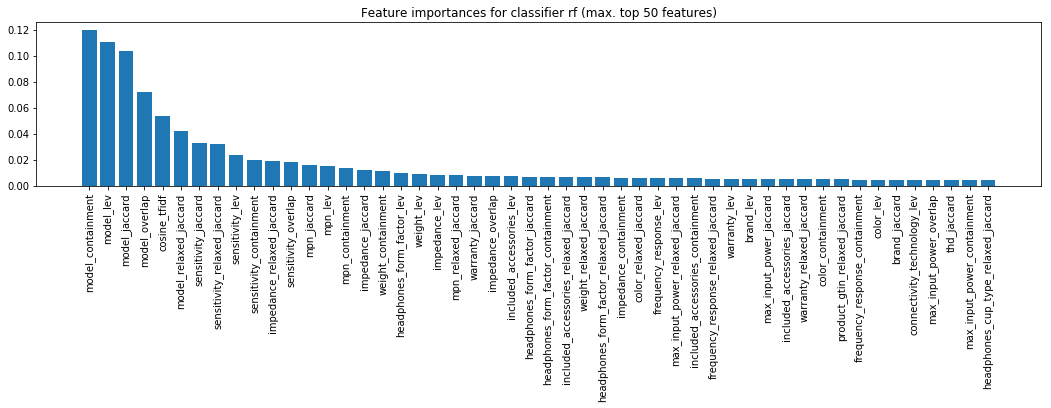

Final Results
Train F1 final iteration, mean  0.858 σ  0.008
Test F1 final iteration, mean  0.950 σ  0.005


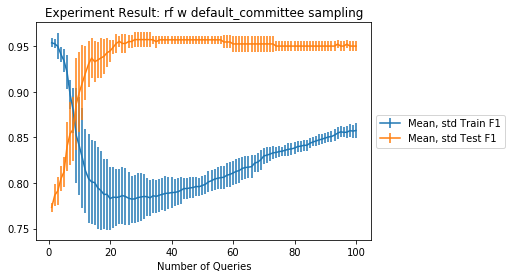

,method,1st iter.,50th iter.,100th iter.
0,noisy_warm_default_committee,0.773,0.957,0.950
1,st. deviaton,0.005,0.005,0.005
2,unsupervised_correctness,0.906,0.927,0.946
3,st. deviaton,0.000,0.001,0.001


In [4]:
import warnings

# Run Active Learning w/o unsupervised bootstrapping
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import md5, sha
    run_boot_al()



In [3]:
from noisy_activelearning import *
from datautils import*
from bootstrapping import*
from bootstrapping_unsupervised import*
from datetime import date
from learning import *
from libact_datasetext import *

#set parameters
dataPathmain = "../datasets/wdc_product"
query_strategy = 'default_committee'
model_type = 'rf'
dataset = 'headphones_headphones_catalog'
domain = 'wdc_product'
boot_size = 0
max_queries = 100
al_runs = 5
bootstrap_method = 'attrelbow_density' 
no_boot = False
boot = True

#prepare result tables
column_names = ["method", "1st iter.", "50th iter."]
for i in range(0, max_queries/100):
    column_names.append("%dth iter." %((i+1)*100))

iteration_results = pd.DataFrame(columns=column_names)

all_column_names = ["method"]
for i in range(0, max_queries):
    all_column_names.append("%dth iter." %(i))
full_results = pd.DataFrame(columns=all_column_names)

def run_boot_al():
                   
    #get data
    featureFile_pool = dataPathmain+'/features_'+dataset+'_train'
    featureFile_validation = dataPathmain+'/features_'+dataset+'_test'

    trainingData = getLabelledDataFromFile(featureFile_pool, rescale=True)
    validationData = getLabelledDataFromFile(featureFile_validation, rescale=True)

    X = trainingData['feature_values']
    y = trainingData['labels']
    ids = trainingData['ids']

    #NO BOOTSTRAPPING
    if (no_boot):
        bootstrap = BootstrappingUnsupervised(sample_size=0, data=X, labels=y, ids=ids, bootstrap_method='bowtopbottom', domain=domain)
        bootstrapping_sample = bootstrap.sample

        al= dict()
        al['pool_data']= X
        al['pool_labels']= y
        al['ids'] = ids

        al['validation_data']= validationData['feature_values']
        al['validation_labels']= validationData['labels']

        al['bootstrapping_data']= bootstrapping_sample['data']
        al['bootstrapping_labels']= bootstrapping_sample['labels']
        al['bootstrapping_indices']=bootstrapping_sample['indices']
        al['bootstrapping_scores'] = bootstrapping_sample['scores']

        display(Markdown("<span style='color:blue;font-size:160%'><b> Active Learning with default_committee Sampling, no Bootstrapping</b></span>" ))
        f1_test = active_learning(al, query_strategy, max_queries, al_runs, model_type)
        addtoresultstable("noboot", f1_test, iteration_results)

        display(Markdown("<span style='color:blue;font-size:160%'><b> Active Learning with default_committee Sampling, no Bootstrapping and warm start</b></span>" ))
        f1_test = active_learning(al, query_strategy, max_queries, al_runs, model_type, warm_start=True)
        addtoresultstable("noboot_warm_start", f1_test, iteration_results)

   
    #UNSUPERVISED BOOTSTRAPPING
    if (boot):
        bootstrap = BootstrappingUnsupervised(data=X, labels=y, ids=ids, bootstrap_method=bootstrap_method, domain=domain)
        bootstrapping_sample = bootstrap.sample
        boot_thres_index = bootstrap.threshold_index
        al= dict()
        al['pool_data']= X
        al['pool_labels']= y
        al['ids'] = ids

        al['validation_data']= validationData['feature_values']
        al['validation_labels']= validationData['labels']

        al['bootstrapping_data']= bootstrapping_sample['data']
        al['bootstrapping_labels']= bootstrapping_sample['labels']
        al['bootstrapping_indices']=bootstrapping_sample['indices']
        al['bootstrapping_scores'] = bootstrapping_sample['scores']
        al['bootstrapping_threshold'] = bootstrap.threshold


        display(Markdown("<span style='color:blue;font-size:160%'><b> Active Learning with "+query_strategy+" Sampling and Noisy but Interesting Bootstrapping score_based Reweight Warm Start</b></span>"))

        f1_test_noisy_reweight, pool_correctness = noisy_active_learning(al, query_strategy, max_queries, al_runs,
                                                          model_type, setting=None, reweight='score_based', warm_start=True)

        addtoresultstable("noisy_warm_"+query_strategy, f1_test_noisy_reweight, iteration_results)
        addtoresultstable("unsupervised_correctness", pool_correctness, iteration_results)

    display(iteration_results)
    
def addtoresultstable(method_name, results, resultstable):
    index = resultstable.shape[0]
    mean_f1 = np.mean(results, axis=0)
    std_f1= np.std(results, axis=0)
    
    
    f1_line = [method_name] + ["%.3f" %mean_f1[0]] + ["%.3f" %mean_f1[49]]
    std_line = ["st. deviaton"] + ["%.3f" %std_f1[0]] + ["%.3f" %std_f1[49]]
    
    for i in range(0, max_queries/100):
        position = (i+1)*100 - 1
        f1_line += ["%.3f" %mean_f1[position]]
        std_line += ["%.3f" %std_f1[position]]
    resultstable.loc[index] = f1_line
    resultstable.loc[index+1] = std_line
    
    f1_line = [method_name]
    std_line = ["st. deviaton"]
    for i in range(0,max_queries):
        f1_line += ["%.3f" %mean_f1[i]]
        std_line += ["%.3f" %std_f1[i]]
    index_full = full_results.shape[0]
    full_results.loc[index_full] = f1_line
    full_results.loc[index_full+1] = std_line
    
    
